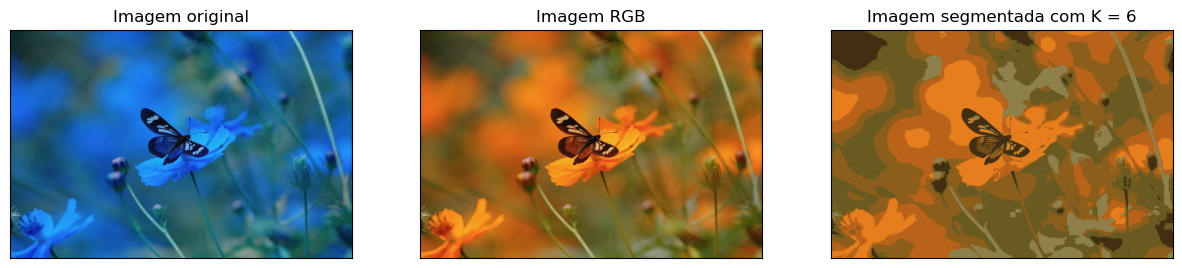

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# CARREGANDO A IMAGEM
original_image = cv2.imread('img.jpg')

# FUNÇÃO PARA TRANSFORMAR DE BGR PARA RGB
def RGB(img_bgr):
    # Obtendo as dimensões da imagem
    l, c, p = img_bgr.shape

    # Criando uma matriz vazia para a imagem RGB
    img_rgb = np.zeros(shape=img_bgr.shape, dtype=np.uint8)

    # Iterando sobre cada pixel da imagem BGR
    for i in range(l):
        for j in range(c):
            # Obtendo os valores BGR do pixel
            b = img_bgr[i, j, 0] 
            g = img_bgr[i, j, 1] 
            r = img_bgr[i, j, 2] 
        
            # Trocando os canais para obter a representação RGB
            img_rgb[i, j, 0] = r
            img_rgb[i, j, 1] = g
            img_rgb[i, j, 2] = b
            
    return img_rgb

# TRANSFORMANDO A IMAGEM BGR EM RGB
img = RGB(original_image)

# CONVERTENDO A IMAGEM EM UMA MATRIZ PX3 ONDE P=MxN E CADA LINHA AGORA É UM VETOR NO ESPAÇO 3D
vectorized = img.reshape((-1, 3))

# CONVERTENDO OS VALORES uint8 PARA float (REQUISITO DO MÉTODO K-MEANS)
vectorized = np.float32(vectorized)

# DEFININDO CRITÉRIOS, NÚMERO DE AGRUPAMENTOS(K) E APLICANDO K-MEANS
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# NÚMERO DE AGRUPAMENTO (NÚMEROS DE CORES QUE QUERO NA IMAGEM SEGMENTADA)
K = 6  # número aproximado de cores da imagem original

# NÚMERO DE VEZES QUE O ALGORITMO É EXECUTADO USANDO DIFERENTES CLASSIFICAÇÕES INICIAIS
# O ALGORITMO RETORNA OS RÓTULOS QUE PRODUZEM MELHOR COMPACTAÇÃO
attempts = 10

# ESPECIFICANDO COMO OS CENTROS INICIAIS SÃO OBTIDOS
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

# CONVERTENDO DE VOLTA PARA uint8
center = np.uint8(center)

# ACESSANDO OS RÓTULOS PARA REGENERAR A IMAGEM AGRUPADA
res = center[label.flatten()]
result_image = res.reshape((img.shape))

# PLOTANDO A IMAGEM ORIGINAL E A IMAGEM RESULTANTE DO AGRUPAMENTO
figure_size = 15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1, 3, 1), plt.imshow(original_image)
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(img)
plt.title('Imagem RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(result_image)
plt.title('Imagem segmentada com K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()